# 5주차_회원 데이터

1.   고객의 행동 예측
2.   고객의 탈퇴 예측



## 탐색적 데이터 분석

In [ ]:
import pandas as pd

uselog = pd.read_csv('use_log.csv')
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
58249,L00000049070579,PL650353,2018-07-15
58250,L00000049070580,PL683089,2018-07-15
58251,L00000049070581,PL732008,2018-07-15
58252,L00000049070582,PL746115,2018-07-15


In [ ]:
customer = pd.read_csv('customer_master.csv')
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0
...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0


In [ ]:
campaign_master = pd.read_csv('campaign_master.csv')
campaign_master

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [ ]:
class_master = pd.read_csv('class_master.csv')
class_master

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


### 레프트조인

pd.merge(left = DF1 , right = DF2, how = "left", on = "해당 기준 열 이름")

In [ ]:
customer_join = pd.merge(customer, class_master, on = 'class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [ ]:
customer_join.groupby("class_name")['customer_id'].count()

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [ ]:
customer_join.groupby('campaign_name')['customer_id'].count()

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [ ]:
customer_join.groupby('gender')['customer_id'].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [ ]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58254 entries, 0 to 58253
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   log_id       58254 non-null  object
 1   customer_id  58254 non-null  object
 2   usedate      58253 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [ ]:
uselog['usedate'] = uselog['usedate'].apply(pd.to_datetime)

uselog['연월'] = uselog['usedate'].dt.strftime('%y%m') #y는 연, m은 월 추출
uselog

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,1804
1,L00000049012331,AS015315,2018-04-01,1804
2,L00000049012332,AS040841,2018-04-01,1804
3,L00000049012333,AS046594,2018-04-01,1804
4,L00000049012334,AS073285,2018-04-01,1804
...,...,...,...,...
58249,L00000049070579,PL650353,2018-07-15,1807
58250,L00000049070580,PL683089,2018-07-15,1807
58251,L00000049070581,PL732008,2018-07-15,1807
58252,L00000049070582,PL746115,2018-07-15,1807


In [ ]:
uselog_months = uselog.groupby(['연월','customer_id'],as_index = False).count() #as_index = False 인덱스로 안바뀌게 해준다!
uselog_months

,연월,customer_id,log_id,usedate
0,1804,AS002855,4,4
1,1804,AS009013,2,2
2,1804,AS009373,3,3
3,1804,AS015315,6,6
4,1804,AS015739,7,7
...,...,...,...,...
12147,1807,TS989482,4,4
12148,1807,TS995299,3,3
12149,1807,TS999079,1,1
12150,1807,TS999231,2,2


In [ ]:
uselog_months.rename(columns={'log_id':'count'},inplace=True)

del uselog_months['usedate']

uselog_months

,연월,customer_id,count
0,1804,AS002855,4
1,1804,AS009013,2
2,1804,AS009373,3
3,1804,AS015315,6
4,1804,AS015739,7
...,...,...,...
12147,1807,TS989482,4
12148,1807,TS995299,3
12149,1807,TS999079,1
12150,1807,TS999231,2


In [ ]:
uselog_customer = uselog_months.groupby('customer_id')['count'].agg(['mean','median','max','min'])
uselog_customer #customer_id 인덱스 부분으로간다

,mean,median,max,min
customer_id,,,,
AS002855,4.00,4.5,5,2
AS008805,6.00,6.0,8,4
AS009013,2.00,2.0,2,2
AS009373,3.50,3.5,4,3
AS015233,6.00,7.0,7,4
...,...,...,...,...
TS993439,6.50,6.5,10,3
TS995299,4.00,3.5,7,2
TS999079,4.75,5.5,7,1


In [ ]:
uselog_customer = uselog_customer.reset_index(drop=False) #인덱스가 아닌 열로 지정

In [ ]:
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.00,4.5,5,2
1,AS008805,6.00,6.0,8,4
2,AS009013,2.00,2.0,2,2
3,AS009373,3.50,3.5,4,3
4,AS015233,6.00,7.0,7,4
...,...,...,...,...,...
3469,TS993439,6.50,6.5,10,3
3470,TS995299,4.00,3.5,7,2
3471,TS999079,4.75,5.5,7,1
3472,TS999231,3.25,3.0,6,1


In [ ]:
# 센터 이용의 정기성 여부
# 정기적 = 매주 특정 요일에 센터를 방문한다
# 월별로, 특정 요일에 몇회 방문했는지!
# 201804 목요일에 4회 방문했다. -> 정기적으로 방문하는 사람이구나!
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,1804,6.0
1,L00000049012331,AS015315,2018-04-01,1804,6.0
2,L00000049012332,AS040841,2018-04-01,1804,6.0
3,L00000049012333,AS046594,2018-04-01,1804,6.0
4,L00000049012334,AS073285,2018-04-01,1804,6.0
...,...,...,...,...,...
58249,L00000049070579,PL650353,2018-07-15,1807,6.0
58250,L00000049070580,PL683089,2018-07-15,1807,6.0
58251,L00000049070581,PL732008,2018-07-15,1807,6.0
58252,L00000049070582,PL746115,2018-07-15,1807,6.0


In [ ]:
uselog_weekday = uselog.groupby(['customer_id','연월','weekday'],as_index = False).count()
uselog_weekday

,customer_id,연월,weekday,log_id,usedate
0,AS002855,1804,5.0,4,4
1,AS002855,1805,2.0,1,1
2,AS002855,1805,5.0,4,4
3,AS002855,1806,5.0,5,5
4,AS002855,1807,5.0,2,2
...,...,...,...,...,...
30043,TS999855,1804,4.0,4,4
30044,TS999855,1805,5.0,3,3
30045,TS999855,1806,3.0,1,1
30046,TS999855,1806,5.0,5,5


In [ ]:
del uselog_weekday['usedate']
uselog_weekday.rename(columns={'log_id':'count'}, inplace = True)
uselog_weekday

,customer_id,연월,weekday,count
0,AS002855,1804,5.0,4
1,AS002855,1805,2.0,1
2,AS002855,1805,5.0,4
3,AS002855,1806,5.0,5
4,AS002855,1807,5.0,2
...,...,...,...,...
30043,TS999855,1804,4.0,4
30044,TS999855,1805,5.0,3
30045,TS999855,1806,3.0,1
30046,TS999855,1806,5.0,5


In [ ]:
# 모든 월에 대해서 4회 이상일 필요는 없고, 그냥 특정 월에 특정 요일에 4회 이상 방문한 적이 있으면 정기적이라고 판단

uselog_weekday = uselog_weekday.groupby("customer_id",as_index = False).max()

uselog_weekday
# 연월에서 맥스인거, weekdat에서 맥스인거, count에서 맥스인거

,customer_id,연월,weekday,count
0,AS002855,1807,5.0,5
1,AS008805,1807,6.0,4
2,AS009013,1804,0.0,2
3,AS009373,1807,6.0,4
4,AS015233,1807,6.0,3
...,...,...,...,...
3469,TS993439,1806,6.0,3
3470,TS995299,1807,6.0,4
3471,TS999079,1807,6.0,5
3472,TS999231,1807,6.0,4


In [ ]:
del uselog_weekday['weekday']

In [ ]:
del uselog_weekday['연월']

In [ ]:
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,4
4,AS015233,3
...,...,...
3469,TS993439,3
3470,TS995299,4
3471,TS999079,5
3472,TS999231,4


In [ ]:
uselog_weekday['routine_flg'] = 0

In [ ]:
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,0
1,AS008805,4,0
2,AS009013,2,0
3,AS009373,4,0
4,AS015233,3,0
...,...,...,...
3469,TS993439,3,0
3470,TS995299,4,0
3471,TS999079,5,0
3472,TS999231,4,0


In [ ]:
# count가 4 이상이면 1
# 조건문 - count가 4 미만이면 0
#uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where('조건문','조건문을 충족하지 않았을 때')
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,4,1
4,AS015233,3,0
...,...,...,...
3469,TS993439,3,0
3470,TS995299,4,1
3471,TS999079,5,1
3472,TS999231,4,1


In [ ]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [ ]:
customer_join = pd.merge(customer_join, uselog_customer, on= 'customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id','routine_flg']], on='customer_id', how='left')
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,4.50,4.0,8.0,2.0,1.0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,5.25,6.0,7.0,2.0,1.0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,3.75,4.0,5.0,2.0,1.0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,4.75,5.0,7.0,2.0,1.0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반,3.50,3.5,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,NaN,NaN,NaN,NaN,NaN
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,NaN,NaN,NaN,NaN,NaN
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반,NaN,NaN,NaN,NaN,NaN
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_join.isnull().sum() #end_date는 탈퇴안했으면 결측치라 상관 x

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean              718
median            718
max               718
min               718
routine_flg       718
dtype: int64

In [ ]:
# 회원에 대해서 회원 기간이 총 몇달이었는지
# 회원인데 탈퇴한 사람 -> 등록한 날짜 - 탈퇴한 날짜
# 회원인데 아직도 회원인 사람 -> 등록한 날짜 - 현재 날짜

In [ ]:
# 날짜 비교 함수 relativedelta를 사용하기 위해 라이브러리를 임포트
from dateutil.relativedelta import relativedelta

# date 부분 다 datetime 타입으로 변경
customer_join["start_date"] = customer_join["start_date"].apply(pd.to_datetime)
customer_join["end_date"] = customer_join["end_date"].apply(pd.to_datetime)

# 날짜 계산용 열을 end_date를 초기값으로 하여 추가.
customer_join["calc_date"] = customer_join["end_date"]

# 결측치에 2019년 4월 30일을 대입
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

# 날짜 비교 함수 relativedelta를 사용.
# cal_date와 start_date의 차이를 계산 후에 membership_period에 회원 기간을 월 단위 추가
customer_join["membership_period"] = 0
for i in range(len(customer_join)): # range(4192) -> 0~4191 숫자가 존재하는 리스트
    delta = relativedelta(customer_join["calc_date"][i], customer_join["start_date"][i])
    customer_join["membership_period"][i] = delta.years*12 + delta.months # 총 회원기간 달의 수
customer_join.head()

<ipython-input-32-00a040b812f8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join["membership_period"][i] = delta.years*12 + delta.months # 총 회원기간 달의 수


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.50,4.0,8.0,2.0,1.0,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.25,6.0,7.0,2.0,1.0,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,3.75,4.0,5.0,2.0,1.0,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.75,5.0,7.0,2.0,1.0,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.50,3.5,6.0,1.0,1.0,2019-04-30,47


In [ ]:
customer_join.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,4192.000000,4192.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,4192.000000
mean,0.322042,8559.875954,4.677365,4.788428,6.632124,2.513529,0.721071,18.835878
std,0.467315,1968.128971,1.521180,1.750036,2.247298,1.195281,0.448537,13.848148
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,3.750000,3.500000,5.000000,2.000000,0.000000,7.000000
50%,0.000000,7500.000000,4.750000,4.500000,7.000000,2.000000,1.000000,15.000000
75%,1.000000,10500.000000,5.750000,6.000000,8.000000,3.000000,1.000000,30.000000
max,1.000000,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [ ]:
customer_join.groupby('routine_flg')['customer_id'].count()

routine_flg
0.0     969
1.0    2505
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

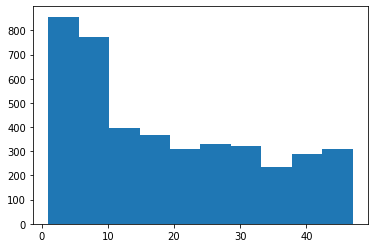

In [ ]:
import matplotlib.pyplot as plt

plt.hist(customer_join['membership_period'])

### 왜 회원들은 탈퇴를 할까? 이유
탈퇴하는 회원들의 특징을 살펴보자

In [ ]:
customer_end = customer_join[customer_join['is_deleted']==1] # 탈퇴한 사람
customer_end.describe()

#전체 회원들의 평균보다 탈퇴한 회원들이 모든 칼럼의 평균에서 다 낮다.

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1350.000000
mean,1.0,8595.555556,4.020051,4.052901,5.735495,2.244027,0.302901,8.026667
std,0.0,1949.163652,1.662880,1.848377,2.617683,1.307604,0.459709,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,2.750000,2.500000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,6.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,5.333333,5.500000,8.000000,3.000000,1.000000,11.000000
max,1.0,10500.000000,12.000000,12.000000,12.000000,12.000000,1.000000,23.000000


In [ ]:
customer_stay = customer_join[customer_join['is_deleted']==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2842.000000
mean,0.0,8542.927516,5.012019,5.162902,7.088619,2.650738,0.933970,23.970443
std,0.0,1977.189779,1.324112,1.570993,1.875518,1.109242,0.248388,13.746761
min,0.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.000000,4.000000,6.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.000000,5.000000,7.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,6.000000,6.000000,8.000000,3.000000,1.000000,35.000000
max,0.0,10500.000000,9.000000,10.000000,14.000000,8.000000,1.000000,47.000000


In [ ]:
# customer_join.to_csv('customer_join.csv', index=False)

## 클러스터링

In [ ]:
customer = pd.read_csv('customer_join.csv')
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [ ]:
customer_clustering = customer[['mean',	'median',	'max', 'min', 'membership_period']]
customer_clustering

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47
...,...,...,...,...,...
4187,8.000000,8.0,8,8,1
4188,10.000000,10.0,10,10,1
4189,8.000000,8.0,8,8,1
4190,11.000000,11.0,11,11,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

In [ ]:
kmeans = KMeans(n_clusters = 4) #4개의 그룹으로 나누겠다
clusters = kmeans.fit(customer_clustering_sc)

In [ ]:
customer_clustering['cluster'] = clusters.labels_
customer_clustering

<ipython-input-44-1c4d9cfc4a9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering['cluster'] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,0
1,5.083333,5.0,7,3,47,0
2,4.583333,5.0,6,3,47,0
3,4.833333,4.5,7,2,47,0
4,3.916667,4.0,6,1,47,0
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,1
4188,10.000000,10.0,10,10,1,1
4189,8.000000,8.0,8,8,1,1
4190,11.000000,11.0,11,11,1,1


In [ ]:
customer_clustering.columns = ["월평균값","월중앙값", "월최댓값", "월최솟값","회원기간", "cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1249,1249,1249,1249,1249
1,838,838,838,838,838
2,1334,1334,1334,1334,1334
3,771,771,771,771,771


In [ ]:
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,4.677561,4.670937,7.233787,2.153723,36.915933
1,8.064079,8.050716,10.014320,6.180191,7.016706
2,5.541974,5.392804,8.757871,2.704648,14.857571
3,3.065504,2.900130,4.783398,1.649805,9.276265


In [ ]:
# 어떤 특성으로 그룹이 4개가 나뉜건지는 정확히 파악 할 수 없다.
# 1번 그룹의 사람들은 회원기간이 길다. 2번같은 경우 짧고 굵게 운동

- 5-8

In [ ]:
from sklearn.decomposition import PCA #주성분 분석

pca = PCA(n_components=2) # 두개의 변수로
x_pca = pca.fit_transform(customer_clustering_sc)

In [ ]:
x_pca

array([[-0.81998232, -1.95909657],
       [-0.70792183, -1.79985685],
       [-1.06149902, -1.65982605],
       ...,
       [ 3.02793307,  1.13963534],
       [ 6.08311415,  0.58470806],
       [ 5.06472045,  0.76968382]])

In [ ]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']
pca_df

,0,1,cluster
0,-0.819982,-1.959097,0
1,-0.707922,-1.799857,0
2,-1.061499,-1.659826,0
3,-1.160764,-1.810139,0
4,-2.017132,-1.670101,0
...,...,...,...
4187,3.027933,1.139635,1
4188,5.064720,0.769684,1
4189,3.027933,1.139635,1
4190,6.083114,0.584708,1


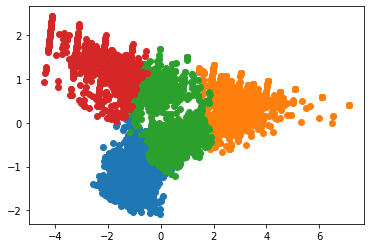

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,4):
  tmp = pca_df[pca_df['cluster']==i]
  plt.scatter(tmp[0], tmp[1]) #산점도

In [ ]:
# 그룹 별로 탈퇴 회원 / 재적 회원의 수치/비율은 어떨게 될까?
# 탈퇴 여부 -> is_deleted -> 1 이면 탈퇴회원
#is_deleted를 알기위해는 customer 변수 필요

customer_clustering = pd.concat([customer_clustering, customer], axis=1)
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,1231
1,0,1,18
2,1,0,820
3,1,1,18
4,2,0,791
5,2,1,543
6,3,1,771


In [ ]:
#3번 cluster그룹은 다 탈퇴를 했네, 0,1번은 탈퇴많이 안했네

In [ ]:
# 그룹 별로 정기적/ 비정기적 이용 여부? - routine_flg가 1이면 정기적

customer_clustering.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,2
1,0,1,1247
2,1,0,51
3,1,1,787
4,2,0,227
5,2,1,1107
6,3,0,499
7,3,1,272


- 5-9

In [ ]:
import pandas as pd

uselog = pd.read_csv('use_log.csv')
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [ ]:
# usedate를 datetime으로 변환 후 '연월' 열을 생성.
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")

# 연월에 대한 각 회원별 사용 횟수 카운트
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [ ]:
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [ ]:
uselog_months['연월'].unique()

array(['201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', '201902', '201903'],
      dtype=object)

In [ ]:
year_months = list(uselog_months['연월'].unique())

In [ ]:
year_months[6]

'201810'

In [ ]:
len(year_months)

12

In [ ]:
for i in range(6, len(year_months)):
  print(year_months[i])

201810
201811
201812
201901
201902
201903


In [ ]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame() # 빈 데이터프레임 생성

# 2018년 10월 데이터에다가 이전 6개월 간의 이용 횟수를 덧붙이려고 합니다!
tmp = uselog_months[uselog_months["연월"]==year_months[6]]

tmp

,연월,customer_id,count
18532,201810,AS002855,3
18533,201810,AS008805,2
18534,201810,AS009373,5
18535,201810,AS015233,7
18536,201810,AS015315,4
...,...,...,...
21597,201810,TS995299,4
21598,201810,TS998593,9
21599,201810,TS999079,6
21600,201810,TS999231,5


In [ ]:
# 2018년 9월 데이터를 10월 데이터에 붙이는 부분
tmp_before = uselog_months[uselog_months["연월"]==year_months[5]] # 9월
tmp_before

,연월,customer_id,count
15424,201809,AS002855,7
15425,201809,AS008805,2
15426,201809,AS009373,6
15427,201809,AS015233,9
15428,201809,AS015315,7
...,...,...,...
18527,201809,TS995299,5
18528,201809,TS998593,9
18529,201809,TS999079,4
18530,201809,TS999231,4


In [ ]:
del tmp_before['연월']

In [ ]:
tmp_before

,customer_id,count
15424,AS002855,7
15425,AS008805,2
15426,AS009373,6
15427,AS015233,9
15428,AS015315,7
...,...,...
18527,TS995299,5
18528,TS998593,9
18529,TS999079,4
18530,TS999231,4


In [ ]:
tmp_before.rename(columns={"count":"count_0"}, inplace=True)
tmp_before

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,customer_id,count_0
15424,AS002855,7
15425,AS008805,2
15426,AS009373,6
15427,AS015233,9
15428,AS015315,7
...,...,...
18527,TS995299,5
18528,TS998593,9
18529,TS999079,4
18530,TS999231,4


In [ ]:
tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left") #10월달을 기준으로 합치자
tmp

,연월,customer_id,count,count_0
0,201810,AS002855,3,7.0
1,201810,AS008805,2,2.0
2,201810,AS009373,5,6.0
3,201810,AS015233,7,9.0
4,201810,AS015315,4,7.0
...,...,...,...,...
3065,201810,TS995299,4,5.0
3066,201810,TS998593,9,9.0
3067,201810,TS999079,6,4.0
3068,201810,TS999231,5,4.0


In [ ]:
# 2018년 8월 데이터를 10월 데이터에 붙이는 부분
tmp_before = uselog_months[uselog_months["연월"]==year_months[4]]
del tmp_before['연월']
tmp_before.rename(columns={"count":"count_1"}, inplace=True)
tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

tmp_before = uselog_months[uselog_months["연월"]==year_months[3]]
del tmp_before['연월']
tmp_before.rename(columns={"count":"count_2"}, inplace=True)
tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

tmp_before = uselog_months[uselog_months["연월"]==year_months[2]]
del tmp_before['연월']
tmp_before.rename(columns={"count":"count_3"}, inplace=True)
tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

tmp_before = uselog_months[uselog_months["연월"]==year_months[1]]
del tmp_before['연월']
tmp_before.rename(columns={"count":"count_4"}, inplace=True)
tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

tmp_before = uselog_months[uselog_months["연월"]==year_months[0]]
del tmp_before['연월']
tmp_before.rename(columns={"count":"count_5"}, inplace=True)
tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

tmp

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
3065,201810,TS995299,4,5.0,7.0,5.0,2.0,7.0,4.0
3066,201810,TS998593,9,9.0,NaN,NaN,NaN,NaN,NaN
3067,201810,TS999079,6,4.0,3.0,2.0,6.0,5.0,7.0
3068,201810,TS999231,5,4.0,3.0,5.0,1.0,4.0,6.0


### for문을 이용하여 간단하게!

In [ ]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame() # 빈 데이터프레임 생성

tmp = uselog_months[uselog_months["연월"]==year_months[6]]

for i in range(0,6):
  tmp_before = uselog_months[uselog_months["연월"]==year_months[5-i]]
  del tmp_before['연월']
  tmp_before.rename(columns={"count":f"count_{i}"}, inplace=True) #f를 사용하여 문자열안에 넣어주기
  tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

tmp

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
3065,201810,TS995299,4,5.0,7.0,5.0,2.0,7.0,4.0
3066,201810,TS998593,9,9.0,NaN,NaN,NaN,NaN,NaN
3067,201810,TS999079,6,4.0,3.0,2.0,6.0,5.0,7.0
3068,201810,TS999231,5,4.0,3.0,5.0,1.0,4.0,6.0


- 위 코드와 아래코드는 동일하다. 설명추가

In [ ]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame() # 빈 데이터프레임 생성

for i in range(6, len(year_months)):
		# i=6 이면 10월이니까, 10월부터 순차적으로 아래 작업 (이전 6개월의 이용횟수 가져오는 작업) 시작
    tmp = uselog_months[uselog_months["연월"]==year_months[i]]
		# 기존 해당 월의 이용횟수는 y값으로 쓸 예정이므로 count_pred 라고 이름 변경
    tmp.rename(columns={"count":"count_pred"}, inplace=True)

		# for문은 순차적으로 1, 2, 3, 4, 5, 6을 꺼낸다.
    for j in range(1, 7):
				# 만약 i=6, j=1 이면 year_months[5] 니까, 9월의 이용횟수를 가지고 옴
				# 만약 i=6, j=2 이면 year_months[4] 니까, 8월의 이용횟수를 가지고 옴
				# 이런식으로 j=6일때까지, 9월, 8월, 7월, 6월, 5월, 4월의 이용횟수를 차례차례 가지고 옴
        tmp_before = uselog_months[uselog_months["연월"]==year_months[i-j]]
        del tmp_before["연월"]
				# 가장 최근 월의 이용횟수를 count_0 이라고 해서 가지고 옴
				# 순차적으로 그 전 월의 이용횟수를 count_1, count_2 ... count_5 로 가지고 옴
        tmp_before.rename(columns={"count":f"count_{j-1}"}, inplace=True)
				# 월 별 이용횟수를 지속적으로 left join 을 통해 결합하여
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

		# (6개월의 이용횟수가 있는 데이터프레임) tmp 와 원래 데이터프레임을 결합
		# for 문이 작동하면서, 처음에는 10월 시점 데이터에 대해 이전 6개월 이용횟수를 결합하고,
		# 그 다음에는 11월 시점에서 이전 6개월 이용횟수를 결합할 것
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)

predict_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [ ]:
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
18305,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaN
18306,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


이전 6개월의 데이터를 통해서 해당 월을 예측하게끔 한 코드이다.

count_pred을 y로 놓고 다른 count를 x로 두면 된다.

### 결측치 제거 - 결측치 있는 행 제거

In [ ]:
predict_data = predict_data.dropna()
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
5,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
7,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...
18304,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0
18306,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


In [ ]:
predict_data = predict_data.reset_index(drop=True)
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


## 최근 가입한 사람들을 가지고 예측(낮은 정확도를 방지)

In [ ]:
predict_data = pd.merge(predict_data, customer, on='customer_id',how='left') #predict_data기준
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,name,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,XXXX,...,2_야간,6000,2_일반,4.500000,5.0,7,2,1,2019-04-30,29
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,XX,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,41
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,XXXXX,...,0_종일,10500,2_일반,4.833333,5.0,7,3,1,2019-04-30,45
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,XXXXX,...,2_야간,6000,2_일반,5.583333,5.5,8,4,1,2019-04-30,22
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,XXXXXX,...,2_야간,6000,2_일반,6.083333,6.0,9,4,1,2019-04-30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3.0,5.0,4.0,5.0,4.0,5.0,XXXXXX,...,2_야간,6000,2_일반,4.500000,4.5,7,2,1,2019-04-30,43
15109,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0,XXXXX,...,2_야간,6000,2_일반,8.142857,8.0,9,7,1,2019-04-30,7
15110,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0,XXX,...,2_야간,6000,2_일반,4.916667,5.5,9,2,1,2019-04-30,34
15111,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0,XXXX,...,0_종일,10500,2_일반,4.666667,5.0,8,1,1,2019-04-30,25


In [ ]:
predict_data['start_date'] = predict_data['start_date'].apply(pd.to_datetime)
predict_data = predict_data[predict_data['start_date']>=pd.to_datetime('20180401')]
predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,name,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
49,201810,AS185951,1,5.0,3.0,3.0,7.0,3.0,10.0,XXXX,...,1_주간,7500,1_입회비무료,3.800000,3.0,10,1,0,2019-01-31,9
55,201810,AS197200,12,6.0,8.0,9.0,6.0,8.0,8.0,XXXX,...,2_야간,6000,1_입회비무료,8.250000,8.0,12,6,1,2019-04-30,12
56,201810,AS200286,3,6.0,3.0,6.0,6.0,7.0,10.0,XXXX,...,0_종일,10500,1_입회비무료,4.900000,5.0,10,1,1,2019-01-31,9
72,201810,AS251169,2,4.0,6.0,5.0,8.0,10.0,7.0,XXXXX,...,0_종일,10500,1_입회비무료,5.200000,5.0,10,2,1,2019-01-31,9
96,201810,AS345469,1,3.0,5.0,6.0,5.0,4.0,7.0,XXXX,...,1_주간,7500,1_입회비무료,3.666667,3.5,7,1,0,2019-03-31,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15097,201903,TS964483,7,8.0,5.0,6.0,9.0,8.0,8.0,XXXXX,...,0_종일,10500,0_입회비반액할인,7.900000,8.0,11,5,1,2019-04-30,10
15103,201903,TS977703,7,8.0,6.0,7.0,5.0,8.0,8.0,XX,...,0_종일,10500,1_입회비무료,7.000000,7.5,8,4,1,2019-04-30,12
15104,201903,TS978415,7,10.0,7.0,6.0,10.0,8.0,6.0,XXX,...,1_주간,7500,2_일반,8.666667,8.0,14,6,1,2019-04-30,9
15106,201903,TS985617,10,10.0,10.0,9.0,8.0,8.0,9.0,XXXX,...,0_종일,10500,2_일반,9.142857,9.0,10,8,1,2019-04-30,7


In [ ]:
predict_data['start_date']

49      2018-04-09
55      2018-04-15
56      2018-04-06
72      2018-04-03
96      2018-04-12
           ...    
15097   2018-06-01
15103   2018-04-15
15104   2018-07-06
15106   2018-09-12
15109   2018-09-01
Name: start_date, Length: 1702, dtype: datetime64[ns]

## 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5"]]
y = predict_data["count_pred"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6115172799479958
0.5923999040507688


## 가중치 출력

In [ ]:
coef = pd.DataFrame({"feature_names":x.columns, "coefficient":model.coef_}) # model.coef_가 가중치 값
coef
#전 달이 가장 큰 영향을 준다.

,feature_names,coefficient
0,count_0,0.321509
1,count_1,0.200264
2,count_2,0.181348
3,count_3,0.175461
4,count_4,0.091339
5,count_5,0.044197


In [ ]:
x1 =[3,4,4,6,8,7]
model.predict([x1])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.74492081])

In [ ]:
# 이전 6개월을 분석한 결과, 해당 월에는 3.7번 정도 방문할 것으로 예상된다.

- 5-10

In [42]:
import pandas as pd

customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [43]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [44]:
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [45]:
year_months = list(uselog_months['연월'].unique())
year_months

[201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903]

In [46]:
uselog = pd.DataFrame()

# for문의 i값을 통해서 year_months[i]는 순차적으로 201805부터 201903까지 호출함.
for i in range(1, len(year_months)):
    tmp = uselog_months[uselog_months["연월"]==year_months[i]]
    
    # year_months[i]의 count값은 count_0으로 명명한 데이터프레임은 tmp
    tmp.rename(columns={"count":"count_0"}, inplace=True)

    # year_months[i]보다 한 달전의 count값은 count_1로 명명한 데이터프레임은 tmp_before
    tmp_before = uselog_months[uselog_months["연월"]==year_months[i-1]]
    del tmp_before["연월"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)

    # tmp와 tmp_before 데이터프레임을 레프트 조인.
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

    # 최종 결과는 uselog라는 데이터프레임에 지속해서 추가
    uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [47]:
uselog

,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0
...,...,...,...,...
33846,201903,TS995853,8,11.0
33847,201903,TS998593,8,7.0
33848,201903,TS999079,3,2.0
33849,201903,TS999231,6,6.0


In [48]:
# 탈퇴회원 데이터만 가지고 와서 uselog와 결합한 후, 탈퇴한 전 달의 uselog만 남기고 다른 달의 uselog는 삭제한다.

exit_customer = customer[customer['is_deleted']==1].reset_index(drop=True)
#.reset_index(drop=True)은 인덱스를 0부터 차례대로 만들어준다.

exit_customer['end_date'] = exit_customer['end_date'].apply(pd.to_datetime)
exit_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23
1,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23
2,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23
3,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23
4,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,2_야간,6000,2_일반,4.5,4.5,6,3,0,2019-02-28,1
1346,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,0_종일,10500,2_일반,7.0,6.0,12,3,0,2019-03-31,2
1347,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,1_주간,7500,2_일반,7.0,7.0,11,3,0,2019-03-31,1
1348,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,2_야간,6000,2_일반,7.0,7.0,10,4,0,2019-03-31,1


In [49]:
# uselog랑 exit_customer랑 결합
# 남기고자하는 연월을 고객데이터에 명시
from dateutil.relativedelta import relativedelta
# 날짜 비교, 계산 패키지이다.

exit_customer['exit_date'] = 0

for i in range(len(exit_customer)):
  exit_customer['exit_date'][i] = exit_customer['end_date'][i] - relativedelta(months = 1) # 빼기 한달을 해준다.

exit_customer

<ipython-input-49-c774074697ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer['exit_date'][i] = exit_customer['end_date'][i] - relativedelta(months = 1) # 빼기 한달을 해준다.


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00
1,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00
2,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30 00:00:00
3,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30 00:00:00
4,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,2_야간,6000,2_일반,4.5,4.5,6,3,0,2019-02-28,1,2019-01-28 00:00:00
1346,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,0_종일,10500,2_일반,7.0,6.0,12,3,0,2019-03-31,2,2019-02-28 00:00:00
1347,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,1_주간,7500,2_일반,7.0,7.0,11,3,0,2019-03-31,1,2019-02-28 00:00:00
1348,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,2_야간,6000,2_일반,7.0,7.0,10,4,0,2019-03-31,1,2019-02-28 00:00:00


In [50]:
exit_customer['연월'] = pd.to_datetime(exit_customer['exit_date']).dt.strftime('%Y%m')
exit_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,연월
0,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00,201803
1,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,1_주간,7500,2_일반,3.0,3.0,3,3,0,2018-04-30,23,2018-03-30 00:00:00,201803
2,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,0_종일,10500,2_일반,1.0,1.0,1,1,0,2018-04-30,23,2018-03-30 00:00:00,201803
3,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,2_야간,6000,2_일반,3.5,3.5,4,3,1,2018-05-31,23,2018-04-30 00:00:00,201804
4,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,0_종일,10500,2_일반,3.0,3.0,3,3,0,2018-05-31,23,2018-04-30 00:00:00,201804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,OA143589,XXXXX,C03,F,2019-01-15,2019-02-28,CA1,1,2_야간,6000,2_일반,4.5,4.5,6,3,0,2019-02-28,1,2019-01-28 00:00:00,201901
1346,GD367382,XXXX,C01,M,2019-01-15,2019-03-31,CA1,1,0_종일,10500,2_일반,7.0,6.0,12,3,0,2019-03-31,2,2019-02-28 00:00:00,201902
1347,OA034442,XXXXX,C02,M,2019-02-05,2019-03-31,CA1,1,1_주간,7500,2_일반,7.0,7.0,11,3,0,2019-03-31,1,2019-02-28 00:00:00,201902
1348,PL508278,XXXXX,C03,M,2019-02-09,2019-03-31,CA1,1,2_야간,6000,2_일반,7.0,7.0,10,4,0,2019-03-31,1,2019-02-28 00:00:00,201902


In [51]:
exit_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        1350 non-null   object        
 1   name               1350 non-null   object        
 2   class              1350 non-null   object        
 3   gender             1350 non-null   object        
 4   start_date         1350 non-null   object        
 5   end_date           1350 non-null   datetime64[ns]
 6   campaign_id        1350 non-null   object        
 7   is_deleted         1350 non-null   int64         
 8   class_name         1350 non-null   object        
 9   price              1350 non-null   int64         
 10  campaign_name      1350 non-null   object        
 11  mean               1350 non-null   float64       
 12  median             1350 non-null   float64       
 13  max                1350 non-null   int64         
 14  min     

In [52]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33851 entries, 0 to 33850
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연월           33851 non-null  int64  
 1   customer_id  33851 non-null  object 
 2   count_0      33851 non-null  int64  
 3   count_1      32650 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.0+ MB


In [53]:
#exit_customer와 uselog를 결합을 시키기 위해 uselog의 연월타입을 exit_customer와 같게 문자로 바꿔주자자
uselog['연월'] = uselog['연월'].astype(str) #문자열

exit_uselog = pd.merge(uselog, exit_customer, on=['customer_id','연월'],how='left')
exit_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33847,201903,TS998593,8,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33848,201903,TS999079,3,2.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33849,201903,TS999231,6,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
exit_uselog = exit_uselog.dropna(subset=['name'])
exit_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,2_일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,2_일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,2_일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31,CA1,...,6000.0,2_일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28 00:00:00
30787,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31,CA3,...,6000.0,1_입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
30827,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31,CA3,...,7500.0,1_입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
30842,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31,CA1,...,7500.0,2_일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28 00:00:00


In [55]:
# 지속회원 데이터만 가지고 와서 uselog와 결합한 후, 아무 달의 uselog만 남기고 다른 달의 uselog는 삭제한다.
# (아무 달을 뽑을 때는 랜덤으로 데이터를 섞고, 중복을 제거하는 방식으로 진행)

conti_customer = customer[customer['is_deleted']==0]
conti_customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [56]:
conti_uselog = pd.merge(uselog, conti_customer, on=['customer_id'], how='left')
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,0_종일,10500.0,2_일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,0_종일,10500.0,0_입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,2_야간,6000.0,2_일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,XXXX,C01,M,2019-02-08,NaN,CA1,...,0_종일,10500.0,2_일반,9.500000,9.5,11.0,8.0,1.0,2019-04-30,2.0
33847,201903,TS998593,8,7.0,XXXXX,C03,M,2018-09-01,NaN,CA1,...,2_야간,6000.0,2_일반,8.142857,8.0,9.0,7.0,1.0,2019-04-30,7.0
33848,201903,TS999079,3,2.0,XXX,C03,M,2016-06-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.916667,5.5,9.0,2.0,1.0,2019-04-30,34.0
33849,201903,TS999231,6,6.0,XXXX,C01,M,2017-03-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,25.0


In [57]:
conti_uselog = conti_uselog.dropna(subset=['name']) # name에 결측치가 있으면 그 행 제거

In [58]:
len(conti_uselog)

27422

In [59]:
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,0_종일,10500.0,2_일반,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,0_종일,10500.0,0_입회비반액할인,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,2_야간,6000.0,2_일반,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33846,201903,TS995853,8,11.0,XXXX,C01,M,2019-02-08,NaN,CA1,...,0_종일,10500.0,2_일반,9.500000,9.5,11.0,8.0,1.0,2019-04-30,2.0
33847,201903,TS998593,8,7.0,XXXXX,C03,M,2018-09-01,NaN,CA1,...,2_야간,6000.0,2_일반,8.142857,8.0,9.0,7.0,1.0,2019-04-30,7.0
33848,201903,TS999079,3,2.0,XXX,C03,M,2016-06-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.916667,5.5,9.0,2.0,1.0,2019-04-30,34.0
33849,201903,TS999231,6,6.0,XXXX,C01,M,2017-03-01,NaN,CA1,...,0_종일,10500.0,2_일반,4.666667,5.0,8.0,1.0,1.0,2019-04-30,25.0


In [60]:
#섞은 후 id의 중복을 제거해서 여러 연월을 얻는다. 섞는 이유는 특정 연월만 뽑히지 않기 위해!

conti_uselog = conti_uselog.sample(frac = 1).reset_index(drop=True) # 1은 전체데이터 모두를 추출해서 섞겠다는 뜻

conti_uselog = conti_uselog.drop_duplicates(subset='customer_id')
conti_uselog

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,201902,HI174281,5,4.0,XXXX,C03,F,2018-02-01,NaN,CA1,...,2_야간,6000.0,2_일반,6.833333,7.0,10.0,4.0,1.0,2019-04-30,14.0
1,201902,GD139130,7,7.0,XXXXX,C02,F,2017-10-01,NaN,CA1,...,1_주간,7500.0,2_일반,7.083333,7.0,9.0,4.0,1.0,2019-04-30,18.0
2,201811,PL390331,8,11.0,XXXXXX,C03,F,2018-08-13,NaN,CA1,...,2_야간,6000.0,2_일반,8.375000,8.0,11.0,6.0,1.0,2019-04-30,8.0
3,201902,IK574479,7,6.0,XXX,C02,F,2017-05-01,NaN,CA1,...,1_주간,7500.0,2_일반,5.833333,6.0,8.0,4.0,1.0,2019-04-30,23.0
4,201805,HI360754,4,5.0,XXX,C03,M,2016-06-01,NaN,CA1,...,2_야간,6000.0,2_일반,4.916667,5.0,8.0,1.0,1.0,2019-04-30,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,201903,IK692635,10,NaN,XXXXX,C02,F,2019-03-15,NaN,CA1,...,1_주간,7500.0,2_일반,10.000000,10.0,10.0,10.0,0.0,2019-04-30,1.0
26545,201903,HI785400,11,NaN,XXXXX,C02,F,2019-03-05,NaN,CA1,...,1_주간,7500.0,2_일반,11.000000,11.0,11.0,11.0,1.0,2019-04-30,1.0
26665,201903,HD126303,9,NaN,XXX,C03,F,2019-03-11,NaN,CA1,...,2_야간,6000.0,2_일반,9.000000,9.0,9.0,9.0,0.0,2019-04-30,1.0
26843,201903,HD246549,10,NaN,XXXXX,C01,F,2019-03-14,NaN,CA1,...,0_종일,10500.0,2_일반,10.000000,10.0,10.0,10.0,0.0,2019-04-30,1.0


In [61]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201902,HI174281,5,4.0,XXXX,C03,F,2018-02-01,NaN,CA1,...,6000.0,2_일반,6.833333,7.0,10.0,4.0,1.0,2019-04-30,14.0,NaN
1,201902,GD139130,7,7.0,XXXXX,C02,F,2017-10-01,NaN,CA1,...,7500.0,2_일반,7.083333,7.0,9.0,4.0,1.0,2019-04-30,18.0,NaN
2,201811,PL390331,8,11.0,XXXXXX,C03,F,2018-08-13,NaN,CA1,...,6000.0,2_일반,8.375000,8.0,11.0,6.0,1.0,2019-04-30,8.0,NaN
3,201902,IK574479,7,6.0,XXX,C02,F,2017-05-01,NaN,CA1,...,7500.0,2_일반,5.833333,6.0,8.0,4.0,1.0,2019-04-30,23.0,NaN
4,201805,HI360754,4,5.0,XXX,C03,M,2016-06-01,NaN,CA1,...,6000.0,2_일반,4.916667,5.0,8.0,1.0,1.0,2019-04-30,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31 00:00:00,CA1,...,6000.0,2_일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28 00:00:00
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31 00:00:00,CA3,...,6000.0,1_입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31 00:00:00,CA3,...,7500.0,1_입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31 00:00:00,CA1,...,7500.0,2_일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28 00:00:00


5-12

In [62]:
predict_data.isnull().sum()

연월                      0
customer_id             0
count_0                 0
count_1               269
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
exit_date            2842
dtype: int64

In [63]:
# end같은 경우는 아직 탈퇴전이기때문에 결측치 이해가능,
# 하지만 count_1은 가입한지 두달도 안된 회원이 있기에 저런 결측치가 나온 것.
# 따라서 count의 결측치 행을 제거해주자

predict_data = predict_data.dropna(subset=['count_1'])
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201902,HI174281,5,4.0,XXXX,C03,F,2018-02-01,NaN,CA1,...,6000.0,2_일반,6.833333,7.0,10.0,4.0,1.0,2019-04-30,14.0,NaN
1,201902,GD139130,7,7.0,XXXXX,C02,F,2017-10-01,NaN,CA1,...,7500.0,2_일반,7.083333,7.0,9.0,4.0,1.0,2019-04-30,18.0,NaN
2,201811,PL390331,8,11.0,XXXXXX,C03,F,2018-08-13,NaN,CA1,...,6000.0,2_일반,8.375000,8.0,11.0,6.0,1.0,2019-04-30,8.0,NaN
3,201902,IK574479,7,6.0,XXX,C02,F,2017-05-01,NaN,CA1,...,7500.0,2_일반,5.833333,6.0,8.0,4.0,1.0,2019-04-30,23.0,NaN
4,201805,HI360754,4,5.0,XXX,C03,M,2016-06-01,NaN,CA1,...,6000.0,2_일반,4.916667,5.0,8.0,1.0,1.0,2019-04-30,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31 00:00:00,CA1,...,6000.0,2_일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28 00:00:00
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31 00:00:00,CA3,...,6000.0,1_입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31 00:00:00,CA3,...,7500.0,1_입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31 00:00:00,CA1,...,7500.0,2_일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28 00:00:00


In [64]:
# 범주형 변수들을 더미변수로 전환

# 사용할 열들만 필터링
target_col = ["campaign_name", "class_name", "gender", "count_0", "count_1", "routine_flg", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_0,count_1,routine_flg,is_deleted
0,2_일반,2_야간,F,5,4.0,1.0,0.0
1,2_일반,1_주간,F,7,7.0,1.0,0.0
2,2_일반,2_야간,F,8,11.0,1.0,0.0
3,2_일반,1_주간,F,7,6.0,1.0,0.0
4,2_일반,2_야간,M,4,5.0,1.0,0.0


In [65]:
predict_data = pd.get_dummies(predict_data)
predict_data

,count_0,count_1,routine_flg,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,campaign_name_2_일반,class_name_0_종일,class_name_1_주간,class_name_2_야간,gender_F,gender_M
0,5,4.0,1.0,0.0,0,0,1,0,0,1,1,0
1,7,7.0,1.0,0.0,0,0,1,0,1,0,1,0
2,8,11.0,1.0,0.0,0,0,1,0,0,1,1,0
3,7,6.0,1.0,0.0,0,0,1,0,1,0,1,0
4,4,5.0,1.0,0.0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3941,4,2.0,0.0,1.0,0,0,1,0,0,1,1,0
3942,5,6.0,0.0,1.0,0,1,0,0,0,1,0,1
3943,1,3.0,0.0,1.0,0,1,0,0,1,0,1,0
3944,5,3.0,1.0,1.0,0,0,1,0,1,0,1,0


In [66]:
# 범주형은 모아니면 도 이기때문에 하나는 삭제해줘도된다.
# 예를들어 gende_F의 반대가 M이니까 gender_M값 삭제, 다른 것들도 3개중에 하나는 삭제

del predict_data['campaign_name_2_일반']
del predict_data['class_name_2_야간']
del predict_data['gender_M']
predict_data

,count_0,count_1,routine_flg,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,class_name_0_종일,class_name_1_주간,gender_F
0,5,4.0,1.0,0.0,0,0,0,0,1
1,7,7.0,1.0,0.0,0,0,0,1,1
2,8,11.0,1.0,0.0,0,0,0,0,1
3,7,6.0,1.0,0.0,0,0,0,1,1
4,4,5.0,1.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3941,4,2.0,0.0,1.0,0,0,0,0,1
3942,5,6.0,0.0,1.0,0,1,0,0,0
3943,1,3.0,0.0,1.0,0,1,0,1,1
3944,5,3.0,1.0,1.0,0,0,0,1,1


In [67]:
# 계속회원과 탈퇴회원의 수를 동일하게 맞춰둔다.
conti = predict_data[predict_data['is_deleted']==0].sample(1052)
conti

,count_0,count_1,routine_flg,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,class_name_0_종일,class_name_1_주간,gender_F
1557,4,5.0,1.0,0.0,0,0,0,0,0
359,6,4.0,1.0,0.0,0,0,0,1,1
1507,6,6.0,1.0,0.0,0,0,1,0,1
1612,6,3.0,1.0,0.0,0,0,0,1,1
791,6,5.0,1.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
637,6,7.0,1.0,0.0,0,0,0,0,0
199,7,3.0,1.0,0.0,0,0,0,0,1
533,7,7.0,1.0,0.0,0,0,1,0,0
1302,4,3.0,1.0,0.0,0,0,0,0,0


In [68]:
exit = predict_data[predict_data['is_deleted']==1]
exit

,count_0,count_1,routine_flg,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,class_name_0_종일,class_name_1_주간,gender_F
2842,3,3.0,0.0,1.0,0,0,1,0,0
2843,2,3.0,1.0,1.0,0,0,1,0,0
2844,5,3.0,0.0,1.0,0,0,1,0,0
2845,5,3.0,0.0,1.0,0,0,1,0,0
2846,1,4.0,0.0,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3941,4,2.0,0.0,1.0,0,0,0,0,1
3942,5,6.0,0.0,1.0,0,1,0,0,0
3943,1,3.0,0.0,1.0,0,1,0,1,1
3944,5,3.0,1.0,1.0,0,0,0,1,1


In [69]:
x = pd.concat([exit, conti], ignore_index=True)

y = x['is_deleted']
del x['is_deleted']

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9328263624841572
0.8783269961977186


In [72]:
# 둘의 정확도 차이가 꽤 있으므로 이런 상황은 과적합이 일어난 상황이다!

In [73]:
# 정확도를 높이는 법
# 1. 모델의 파라미터 변경

In [74]:
x = pd.concat([exit, conti], ignore_index=True)
y = x["is_deleted"]
del x["is_deleted"]
x_train, x_test, y_train, y_test = train_test_split(x, y)

model = DecisionTreeClassifier(random_state=0, max_depth=5) #max_depth 추가
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
print(model.score(x_train, y_train))

# 차이가 줄어들고 test모델의 정확도가 높아졌다. 과적합 예방!

0.870722433460076
0.876425855513308


In [75]:
# 가중치(기여도) 확인
importance = pd.DataFrame({"feature_names":x.columns, "coefficient":model.feature_importances_})
importance

,feature_names,coefficient
0,count_0,0.585123
1,count_1,0.074979
2,routine_flg,0.248830
3,campaign_name_0_입회비반액할인,0.023966
4,campaign_name_1_입회비무료,0.067103
5,class_name_0_종일,0.000000
6,class_name_1_주간,0.000000
7,gender_F,0.000000


In [76]:
# 임의의 회원 정보
count_0 = 4
count_1 = 3
routine_flg = 1
campaign_name_0 = 0
campaign_name_1 = 1 # 입회비무료
class_name_0 = 1 # 종일 회원
class_name_1 = 0
gender_F = 1

input_data = [count_0, count_1, routine_flg, campaign_name_0, campaign_name_1, class_name_0, class_name_1, gender_F]


In [77]:
print(model.predict([input_data]))

# 이 사람은 탈퇴를 할 것이다라고 예측했다.

[1.]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [78]:
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
predict_data

,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date
0,201902,HI174281,5,4.0,XXXX,C03,F,2018-02-01,NaN,CA1,...,6000.0,2_일반,6.833333,7.0,10.0,4.0,1.0,2019-04-30,14.0,NaN
1,201902,GD139130,7,7.0,XXXXX,C02,F,2017-10-01,NaN,CA1,...,7500.0,2_일반,7.083333,7.0,9.0,4.0,1.0,2019-04-30,18.0,NaN
2,201811,PL390331,8,11.0,XXXXXX,C03,F,2018-08-13,NaN,CA1,...,6000.0,2_일반,8.375000,8.0,11.0,6.0,1.0,2019-04-30,8.0,NaN
3,201902,IK574479,7,6.0,XXX,C02,F,2017-05-01,NaN,CA1,...,7500.0,2_일반,5.833333,6.0,8.0,4.0,1.0,2019-04-30,23.0,NaN
4,201805,HI360754,4,5.0,XXX,C03,M,2016-06-01,NaN,CA1,...,6000.0,2_일반,4.916667,5.0,8.0,1.0,1.0,2019-04-30,34.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,201902,TS645212,4,2.0,XXXX,C03,F,2018-03-01,2019-03-31 00:00:00,CA1,...,6000.0,2_일반,4.500000,4.5,7.0,1.0,0.0,2019-03-31,12.0,2019-02-28 00:00:00
3942,201902,TS741703,5,6.0,XXXX,C03,M,2018-12-08,2019-03-31 00:00:00,CA3,...,6000.0,1_입회비무료,6.250000,6.0,8.0,5.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
3943,201902,TS859258,1,3.0,XXXXX,C02,F,2018-12-07,2019-03-31 00:00:00,CA3,...,7500.0,1_입회비무료,2.500000,2.0,5.0,1.0,0.0,2019-03-31,3.0,2019-02-28 00:00:00
3944,201902,TS886985,5,3.0,XXX,C02,F,2018-03-01,2019-03-31 00:00:00,CA1,...,7500.0,2_일반,4.250000,4.0,7.0,2.0,1.0,2019-03-31,12.0,2019-02-28 00:00:00


- 재적기간 변수를 추가하여 정확도 즉, 예측을 높여준다

In [79]:
from dateutil.relativedelta import relativedelta

# 임의로 period라는 열을 생성
predict_data["period"] = 0

# 연월 열을 datetime 타입으로 변경한 후에 now_date 열로서 추가
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")

# start_date(스포츠 센터를 처음 이용한 날짜)를 datetime 타입의 열로 변환
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
# datetime끼리는 비교가능

# 이전 영상들과 마찬가지로 relativedelta를 사용하여 이용 기간(개월 수)를 period열로 추가
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = int(delta.years*12 + delta.months)
predict_data.head()

<ipython-input-79-a9ddc3aca138>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["period"][i] = int(delta.years*12 + delta.months)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flg,calc_date,membership_period,exit_date,period,now_date
0,201902,HI174281,5,4.0,XXXX,C03,F,2018-02-01,NaN,CA1,...,6.833333,7.0,10.0,4.0,1.0,2019-04-30,14.0,NaN,12,2019-02-01
1,201902,GD139130,7,7.0,XXXXX,C02,F,2017-10-01,NaN,CA1,...,7.083333,7.0,9.0,4.0,1.0,2019-04-30,18.0,NaN,16,2019-02-01
2,201811,PL390331,8,11.0,XXXXXX,C03,F,2018-08-13,NaN,CA1,...,8.375000,8.0,11.0,6.0,1.0,2019-04-30,8.0,NaN,2,2018-11-01
3,201902,IK574479,7,6.0,XXX,C02,F,2017-05-01,NaN,CA1,...,5.833333,6.0,8.0,4.0,1.0,2019-04-30,23.0,NaN,21,2019-02-01
4,201805,HI360754,4,5.0,XXX,C03,M,2016-06-01,NaN,CA1,...,4.916667,5.0,8.0,1.0,1.0,2019-04-30,34.0,NaN,23,2018-05-01


In [80]:
# 결측치 제거
predict_data = predict_data.dropna(subset=["count_1"])

# 필요한 열만 가져와서 저장
# !!!!이제 재적기간도 활용해서 학습을 시킬 것이기 때문에, period 열을 추가했습니다!!!!
target_col = ["campaign_name", "class_name", "gender", "count_0", "count_1", "period", "routine_flg", "is_deleted"]
predict_data = predict_data[target_col]

# 더미형 변수로 변환
predict_data = pd.get_dummies(predict_data)
predict_data

# 필요없는 더미열 제거
del predict_data["campaign_name_2_일반"]
del predict_data["class_name_2_야간"]
del predict_data["gender_M"]

# 데이터 비율 균형 맞추기
conti = predict_data[predict_data['is_deleted']==0].sample(1052)
exit = predict_data[predict_data['is_deleted']==1]

In [81]:
x = pd.concat([exit, conti], ignore_index=True)
y = x["is_deleted"]
del x["is_deleted"]
x_train, x_test, y_train, y_test = train_test_split(x, y)

model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))
print(model.score(x_train, y_train))

0.973384030418251
0.9702154626108999


F1 score - 조화평균

(래이블이 불균형할 때 사용하면 좋다)

In [82]:
#평가의 다양한 방법법
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def metrics(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현률 : {recall}') # :.4f는 소수점 4자리까지만 출력력
  print(f'f1-score : {f1:.4f}')

In [83]:
#결정트리학습(분류류)
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics(y_test, y_pred)

정확도 : 0.9734, 정밀도 : 0.9695, 재현률 : 0.9769230769230769
f1-score : 0.9732


In [84]:
#로지스틱 회귀학습습
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics(y_test, y_pred)

정확도 : 0.9658, 정밀도 : 0.9690, 재현률 : 0.9615384615384616
f1-score : 0.9653
